In [145]:
import random

import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pylab as plt

In [98]:
# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic', size=14)
# 마이너스
plt.rc("axes", unicode_minus=False)

In [116]:
session_times = pd.read_csv('data/web_page_data.csv')
session_times.head()

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67


In [106]:
# 순열 검정 예제 with stickiness
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[list(idx_B)].mean() - x.loc[list(idx_A)].mean()

In [107]:
obs_pct_diff = 100 * (200 / 23739 - 182 / 22588) # 각 A와 B의 전환율 차이 * 100
conversion = [0] * 45945 # 전환 안된 것 = 23539 + 22406
conversion.extend([1] * 382) # 전환 된 것 = 200 + 182 (extend로 원소만 뒤에 넣기)
conversion = pd.Series(conversion) # 시리즈로 만들기
print('전환율 차이 :', obs_pct_diff, '시리즈 크기 :', conversion.shape)

전환율 차이 : 0.03675791182059275 시리즈 크기 : (46327,)


In [172]:
# 순열 검정, A의 크기, B의 크기
# 1. 가격 A의 표본을 섞어서 뽑고 그 중 1이 몇 개인지 기록한다
# 2. 나머지 가격 B의 표본에서 1의 수를 기록한다.
# 3. 1의 비율 차이를 기록한다.
# 4. 2~4단계를 반복한다.
perm_diffs = [100 * perm_fun(conversion, 23739, 22588) 
              for _ in range(1000)]

관측된 차이: 0.0368%


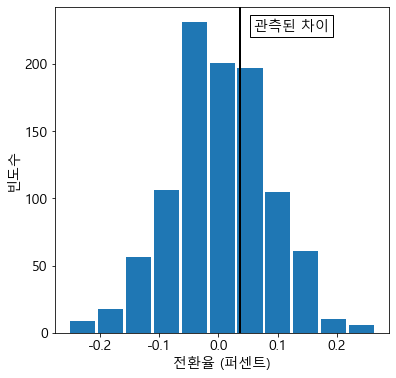

In [174]:
# 이 차이가 얼마나 자주 차이랑 다른가? 그래프 그리기
# 범위내에 있음을 알 수 있다.
# perm_diffs 결과에 따라 그래프가 달라진다.
print(f'관측된 차이: {obs_pct_diff:.4f}%')

fig, ax = plt.subplots(figsize=(6, 6))
ax.hist(perm_diffs, bins=11, rwidth=0.9)  #  히스토그램으로 만들기
ax.axvline(x=obs_pct_diff, color='black', lw=2) # 선 생성
ax.text(0.06, 225, '관측된 차이', bbox={'facecolor':'white'}) # text 생성
ax.set_xlabel('전환율 (퍼센트)')
ax.set_ylabel('빈도수')

plt.show()

In [180]:
# np.mean은 bool 값이 아닌 원래 값을 곱해준다.
# 재표본추출마다 결과가 다르다.
# p 값 구하는 법 간단하게 구하려고 양수만 구하기 위해 오른쪽만 계산함
np.mean([diff > obs_pct_diff for diff in perm_diffs])

0.346

In [176]:
survivors = [[200, 23539], [182, 22406]]
chi2, p_value, df, _ = stats.chi2_contingency(survivors)

print(f'p-value for single sided test: {p_value / 2:.4f}')

p-value for single sided test: 0.3498
